<a href="https://colab.research.google.com/github/Ecevangelista/422_Classification_MNIST/blob/main/Assignment6_2_13_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statistics
import numpy as np
from numpy import arange
import statsmodels
import statsmodels.api as sm
from scipy.stats import norm,uniform, reciprocal
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, PrecisionRecallDisplay, f1_score, precision_score, recall_score, classification_report, homogeneity_score, silhouette_score, silhouette_samples, completeness_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, scale
from yellowbrick.model_selection import FeatureImportances 
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
from datetime import datetime

# Ingest

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/422NU/MNIST_train.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

# EDA

I removed columns with only 0s on the lower ends and upper ends of the dataframe since they aren't useful for the models. 

In [6]:
df4 = df.copy(deep = True)

In [7]:
df4 = df4.drop(columns = ['pixel0','pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12','pixel113', 'pixel12', 'pixel13', 'pixel14', 
                          'pixel15','pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 
                          'pixel31',  'pixel32','pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel779' ])

Looking at distribution of labels 0-9. The classes are evenly balanced, so no need to rebalance classes prior to building the models.

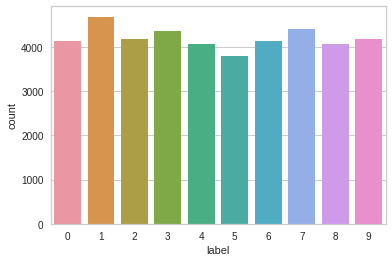

In [30]:
#Countplot of labels

sns.countplot(x =df4['label'], data = df4)
 
plt.show()

# Random Forest Classifier

In [9]:
#split df into test and train
Xran = df4.drop(columns = ['label'])
yran = df4['label']


X_trainran, X_testran, y_trainran, y_testran = train_test_split(Xran,yran, test_size = 0.2, random_state = 10)

In [12]:
#printing run time

start = datetime.now()

clfran=RandomForestClassifier(n_estimators=100, random_state = 5)

clfran.fit(X_trainran,y_trainran)

end = datetime.now()
print("Script run time:", end-start)

0:00:24.063829


In [13]:
y_predran=clfran.predict(X_testran)

In [14]:
#Classification Report

print(classification_report(y_testran, y_predran))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       796
           1       0.98      0.99      0.98       946
           2       0.96      0.96      0.96       856
           3       0.96      0.96      0.96       856
           4       0.96      0.98      0.97       826
           5       0.97      0.97      0.97       773
           6       0.97      0.98      0.98       787
           7       0.98      0.96      0.97       869
           8       0.96      0.93      0.95       836
           9       0.96      0.95      0.95       855

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



# PCA that represents 95% of the variability 

In [15]:
#Finding number of components that represents 95% of the variability

start = datetime.now()

X_std1 = StandardScaler().fit_transform(X_trainran)

pca = PCA()
pca.fit(X_std1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) +1

end = datetime.now()
print("Script run time:", end-start)

print("PCA Components:", d)

315


In [ ]:
# fits PCA, transforms data and fits the Random Forest classifier
# on the transformed data
start = datetime.now()

pca2 = PCA(n_components = 0.95)
ranforpipe = RandomForestClassifier(n_estimators=100, random_state = 5)

pipe = Pipeline(steps = [('scale', StandardScaler()),
                 ('pca', pca2),
                 ('tree', ranforpipe)])

ranforpipe = pipe.fit(X_trainran, y_trainran)

end = datetime.now()
print("Script run time:", end-start)

In [ ]:
#Get predictions
y_predran3test=ranforpipe.predict(X_testran)

In [ ]:
#Classification Report PCA PIPELINE

print(classification_report(y_testran, y_predran3test))

# KMeans Silhouette Diagram

I generated a Silhouette Diagram on the edited dataframe to look at how different sizes of k clustered the dataset

For n_clusters = 10 The average silhouette_score is : 0.05890175098184563
For n_clusters = 11 The average silhouette_score is : 0.05993419402197988
For n_clusters = 12 The average silhouette_score is : 0.060647931993221875
For n_clusters = 13 The average silhouette_score is : 0.059875058110599004
For n_clusters = 14 The average silhouette_score is : 0.055923317475253365
For n_clusters = 15 The average silhouette_score is : 0.04578219204597983


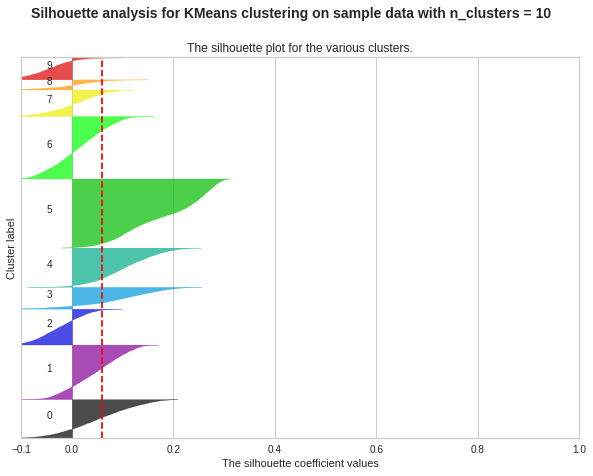

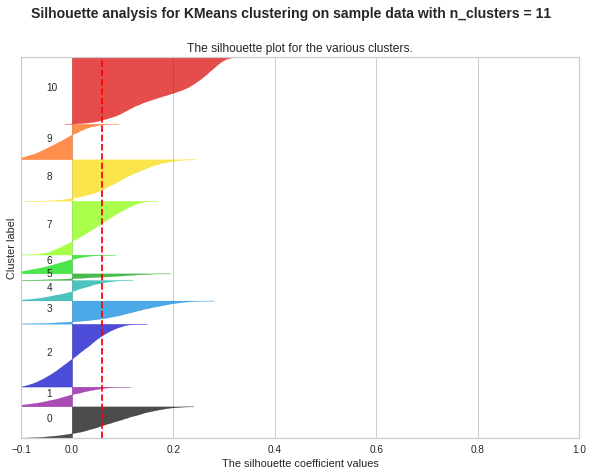

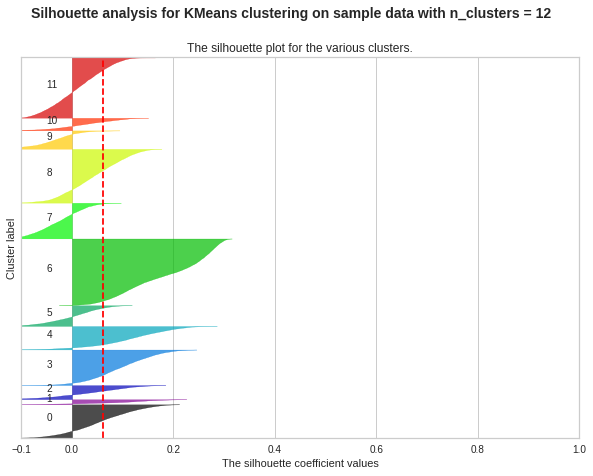

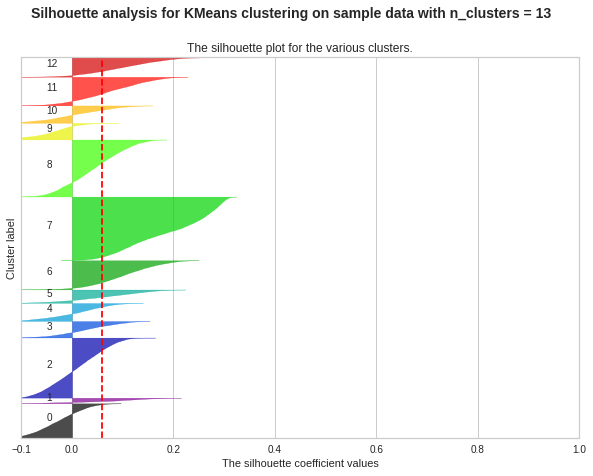

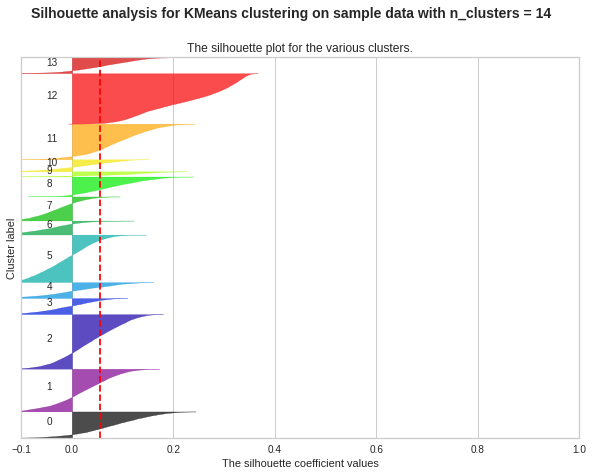

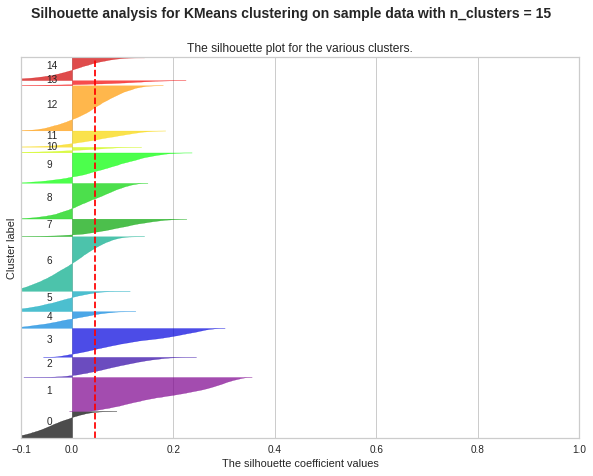

In [18]:
#silhouette analysis with silhouette diagram with values closer to 10

range_n_clusters = [10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)


    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_trainran) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans2 = KMeans(n_clusters=n_clusters, random_state = 10)
    pipek2 = Pipeline(steps = [('scale', StandardScaler()),
                 ('kmeans', kmeans2)])
    cluster_labels = pipek2.fit_predict(X_trainran)

    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_trainran, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_trainran, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# K-Means using tensorflow MNIST dataset 

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shape of dataset
print("Training: {}".format(X_train.shape))
print("Test: {}".format(X_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Training: (60000, 28, 28)
Test: (10000, 28, 28)


In [21]:
# Convert each image to 1d array (28x28 -> 784x1)
X_train = X_train.reshape(len(X_train), -1)
print(X_train.shape)

(60000, 784)


In [22]:
# Normalize the data to 0 - 1
X_train = X_train.astype(np.float32) / 255.

In [23]:
# Convert each image to 1d array (28x28 -> 784x1)
X_test = X_test.reshape(len(X_test), -1)
print(X_test.shape)

(10000, 784)


In [24]:
#Normalize X_test

X_test = X_test.astype(np.float32) / 255.

In [25]:
n_digits = len(np.unique(y_train))
print(n_digits)

10


In [ ]:
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X_train)

In [26]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])

In [ ]:
#FITTING ON XTEST
kmeanst = MiniBatchKMeans(n_clusters=10)
kmeanst.fit(X_test)

In [ ]:
#Classification Report 

print(classification_report(y_test, test_prediction))

Trying higher cluster sizes to find optimal cluster size

In [ ]:
def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [ ]:
#TRYING HIGHER N_CLUSTERS TO IMPROVE ACCURACY

clusters200 = [200, 250, 256, 260, 265 ]
iner_list = []
homo_list = []
comp_list = []
acc_list = []


for n_clusters in clusters200:
    estimator = MiniBatchKMeans(n_clusters=n_clusters, random_state = 10)
    estimator.fit(X_train)

    inertia, homo = calc_metrics(estimator, X_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)

    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    predictiontrain = infer_data_labels(estimator.labels_, cluster_labels)

    comp = completeness_score(y_train, predictiontrain)
    comp_list.append(comp)
    print("Completeness score: {}".format(comp))

    acc = accuracy_score(y_train, predictiontrain)
    acc_list.append(acc)
    print("Accuracy score: {}".format(acc))



In [27]:
#FITTING ON XTEST n_clusters = 256
start = datetime.now()

kmeanst = MiniBatchKMeans(n_clusters=256)
kmeanst.fit(X_test)

end = datetime.now()
print("Script run time:", end-start)

Script run time: 0:00:13.187971


In [28]:
#predict XTEST
cluster_labels = infer_cluster_labels(kmeanst, y_test)
test_clusters = kmeanst.predict(X_test)
test_prediction256 = infer_data_labels(test_clusters, cluster_labels)
print('Accuracy: {}'.format(accuracy_score(y_test, test_prediction256)))

Accuracy: 0.9024


In [29]:
#Classification Report 

print(classification_report(y_test, test_prediction256, zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.87      0.93      0.90      1032
           3       0.91      0.86      0.88      1010
           4       0.86      0.89      0.87       982
           5       0.88      0.90      0.89       892
           6       0.94      0.96      0.95       958
           7       0.87      0.89      0.88      1028
           8       0.90      0.84      0.87       974
           9       0.87      0.80      0.83      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

